**Loading the Dataset IMDB**

In [1]:
from tensorflow.keras.datasets import imdb
(reviews_train, sentiments_train), (reviews_test, sentiments_test) = imdb.load_data(
    num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
reviews_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
sentiments_train[0]


1

In [4]:
max([max(sequence) for sequence in reviews_train])


9999

**Converting Reviews into Text**

In [5]:
word_dict = imdb.get_word_index()
index_to_word_map = {value: key for key, value in word_dict.items()}
decoded_review_text = " ".join([index_to_word_map.get(i - 3, "?") for i in reviews_train[0]])


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Preparing the Data:** Encoding Integer Sequences Using Multi-Hot Encoding

In [6]:
import numpy as np
def encode_sequences(sequences, dimension=10000):
    encoded_results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        for j in seq:
            encoded_results[i, j] = 1.
    return encoded_results

reviews_train_encoded = encode_sequences(reviews_train)
reviews_test_encoded = encode_sequences(reviews_test)

In [7]:
reviews_train_encoded[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
sentiments_train_array = np.asarray(sentiments_train).astype("float32")
sentiments_test_array = np.asarray(sentiments_test).astype("float32")

**Building the Model with Different Configurations**

Professor's Provided Model – Baseline Model

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

sentiment_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

sentiment_model.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

Q1: Building the Model with One Hidden Layer

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

single_hidden_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

single_hidden_layer_model.compile(optimizer="rmsprop",
                                  loss="binary_crossentropy",
                                  metrics=["accuracy"])

Building the Model with Three Hidden Layers

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

triple_hidden_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # Hidden layer 1
    layers.Dense(16, activation="relu"),  # Hidden layer 2
    layers.Dense(16, activation="relu"),  # Hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

triple_hidden_layer_model.compile(optimizer="rmsprop",
                                  loss="binary_crossentropy",
                                  metrics=["accuracy"])

Q2: Building the Model with Fewer Hidden Units (32 Hidden Units)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

triple_hidden_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # Hidden layer 1
    layers.Dense(16, activation="relu"),  # Hidden layer 2
    layers.Dense(16, activation="relu"),  # Hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

triple_hidden_layer_model.compile(optimizer="rmsprop",
                                  loss="binary_crossentropy",
                                  metrics=["accuracy"])

Building the Model with More Hidden Units (64 Hidden Units)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

sixty_four_units_model = keras.Sequential([
    layers.Dense(64, activation="relu"),  # Hidden units 64
    layers.Dense(64, activation="relu"),  # Hidden units 64
    layers.Dense(1, activation="sigmoid")
])

sixty_four_units_model.compile(optimizer="rmsprop",
                               loss="binary_crossentropy",
                               metrics=["accuracy"])

Q3: Building the Base Model with MSE Loss Function

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

mse_loss_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

mse_loss_model.compile(optimizer="rmsprop",
                       loss="mse",
                       metrics=["accuracy"])

Q4: Building the Model with Tanh Activation

In [15]:
model_tanh_activation = keras.Sequential([
    layers.Dense(16, activation="tanh"),  # Tanh activation
    layers.Dense(16, activation="tanh"),  # Tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh_activation.compile(optimizer="rmsprop",
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

Q5: Building the Model with Regularization

In [17]:
from tensorflow.keras import regularizers

l2_regularized_model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # Applied L2 regularization
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # Applied L2 regularization
    layers.Dense(1, activation="sigmoid")
])

l2_regularized_model.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])

Building the Model with Dropout

In [16]:
model_dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_dropout.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

Creating a Validation Set

In [18]:
reviews_val = reviews_train_encoded[:10000]
partial_reviews_train = reviews_train_encoded[10000:]
sentiments_val = sentiments_train_array[:10000]
partial_sentiments_train = sentiments_train_array[10000:]

**Training the Model**

Baseline Model

In [19]:
base_model_history = sentiment_model.fit(partial_reviews_train,
                                         partial_sentiments_train,
                                         epochs=20,
                                         batch_size=512,
                                         validation_data=(reviews_val, sentiments_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6824 - loss: 0.6081 - val_accuracy: 0.8615 - val_loss: 0.4100
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8849 - loss: 0.3595 - val_accuracy: 0.8808 - val_loss: 0.3161
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9151 - loss: 0.2572 - val_accuracy: 0.8871 - val_loss: 0.2850
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9354 - loss: 0.2042 - val_accuracy: 0.8781 - val_loss: 0.2986
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9442 - loss: 0.1686 - val_accuracy: 0.8867 - val_loss: 0.2778
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9562 - loss: 0.1402 - val_accuracy: 0.8819 - val_loss: 0.2926
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9612 - loss: 0.1250 - val_accuracy: 0.8687 - val_loss: 0.3471
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9692 - loss: 0.1068 - val_accuracy: 0.8692 - v

In [20]:
base_model_history_dict = base_model_history.history
base_model_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Visualizing Training and Validation Loss Trends**

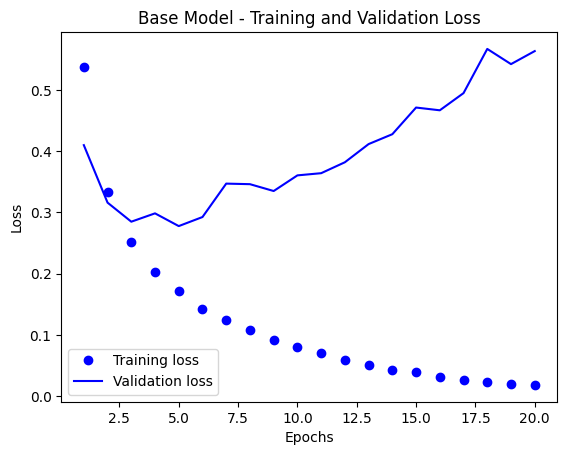

In [21]:
import matplotlib.pyplot as plt

base_model_history_dict = base_model_history.history
training_loss_base = base_model_history_dict["loss"]
validation_loss_base = base_model_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_base) + 1)

plt.plot(epoch_range, training_loss_base, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_base, "b", label="Validation loss")
plt.title("Base Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Graph

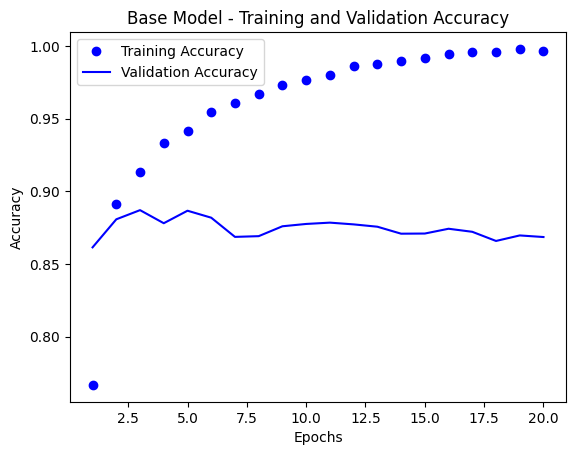

In [22]:
plt.clf()
training_acc_base = base_model_history_dict["accuracy"]
validation_acc_base = base_model_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_base, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_base, "b", label="Validation Accuracy")
plt.title("Base Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [23]:
final_sentiment_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

final_sentiment_model.compile(optimizer="rmsprop",
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

final_sentiment_model.fit(reviews_train_encoded, sentiments_train_array, epochs=4, batch_size=512)
final_model_results = final_sentiment_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7171 - loss: 0.5781
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9021 - loss: 0.2975
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9170 - loss: 0.2280
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9325 - loss: 0.1902
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8884 - loss: 0.2813


In [24]:
final_model_results

[0.2802196443080902, 0.889519989490509]

Using Trained Model to Make Predictions

In [25]:
final_sentiment_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.18578516],
       [0.99850917],
       [0.9196369 ],
       ...,
       [0.10440905],
       [0.06353576],
       [0.5942569 ]], dtype=float32)

**1. Model with One Hidden Layer**

In [26]:
single_hidden_layer_history = single_hidden_layer_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7304 - loss: 0.5809 - val_accuracy: 0.8638 - val_loss: 0.4090
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.8914 - loss: 0.3592 - val_accuracy: 0.8778 - val_loss: 0.3414
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9119 - loss: 0.2774 - val_accuracy: 0.8853 - val_loss: 0.3030
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9225 - loss: 0.2398 - val_accuracy: 0.8868 - val_loss: 0.2874
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9362 - loss: 0.2010 - val_accuracy: 0.8887 - val_loss: 0.2781
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9439 - loss: 0.1817 - val_accuracy: 0.8888 - val_loss: 0.2746
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9499 - loss: 0.1633 - val_accuracy: 0.8884 - val_loss: 0.2754
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9564 - loss: 0.1468 - val_accuracy: 0.8814 - v

In [27]:
single_hidden_layer_history_dict = single_hidden_layer_history.history
single_hidden_layer_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Display Training and Validation Loss**

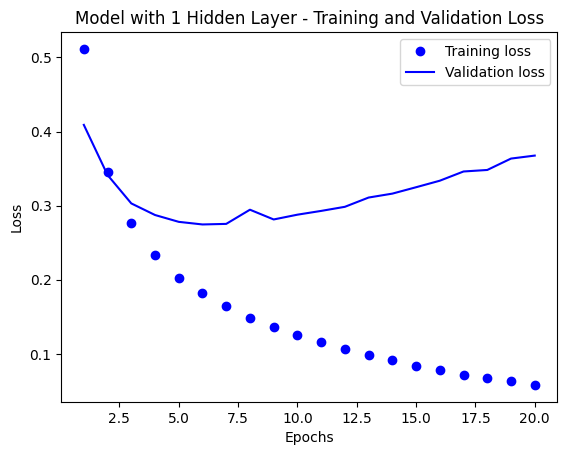

In [28]:
import matplotlib.pyplot as plt

single_hidden_layer_history_dict = single_hidden_layer_history.history
training_loss_single_hl = single_hidden_layer_history_dict["loss"]
validation_loss_single_hl = single_hidden_layer_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_single_hl) + 1)

plt.plot(epoch_range, training_loss_single_hl, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_single_hl, "b", label="Validation loss")
plt.title("Model with 1 Hidden Layer - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Curve

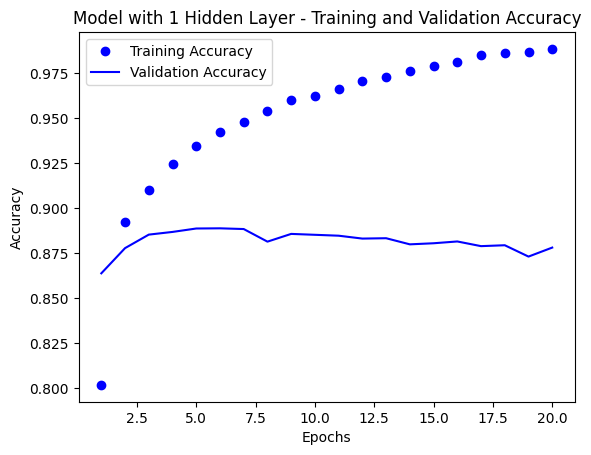

In [29]:
plt.clf()
training_acc_single_hl = single_hidden_layer_history_dict["accuracy"]
validation_acc_single_hl = single_hidden_layer_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_single_hl, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_single_hl, "b", label="Validation Accuracy")
plt.title("Model with 1 Hidden Layer - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [30]:
single_hidden_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])

single_hidden_layer_model.compile(optimizer="rmsprop",
                                  loss="binary_crossentropy",
                                  metrics=["accuracy"])

single_hidden_layer_model.fit(reviews_train_encoded, sentiments_train_array, epochs=4, batch_size=512)
single_hidden_layer_results = single_hidden_layer_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7682 - loss: 0.5269
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9017 - loss: 0.2992
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9203 - loss: 0.2347
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9273 - loss: 0.2092
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8790 - loss: 0.2932


In [31]:
single_hidden_layer_results

[0.29450470209121704, 0.8802400231361389]

Making Predictions by Using the Trained Model

In [32]:
single_hidden_layer_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.19196782],
       [0.99872935],
       [0.62370557],
       ...,
       [0.08030153],
       [0.06725377],
       [0.3972539 ]], dtype=float32)

**2. Model with Three Hidden Layers**

In [33]:
triple_hidden_layer_history = triple_hidden_layer_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6667 - loss: 0.6271 - val_accuracy: 0.8027 - val_loss: 0.4649
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8835 - loss: 0.3727 - val_accuracy: 0.8415 - val_loss: 0.3781
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9163 - loss: 0.2572 - val_accuracy: 0.8706 - val_loss: 0.3169
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9344 - loss: 0.1944 - val_accuracy: 0.8861 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9449 - loss: 0.1638 - val_accuracy: 0.8842 - val_loss: 0.2896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9593 - loss: 0.1328 - val_accuracy: 0.8860 - val_loss: 0.2921
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9693 - loss: 0.1044 - val_accuracy: 0.8839 - val_loss: 0.3078
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9712 - loss: 0.0953 - val_accuracy: 0.8790 - v

In [34]:
triple_hidden_layer_history_dict = triple_hidden_layer_history.history
triple_hidden_layer_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Show Training and Validation Loss**

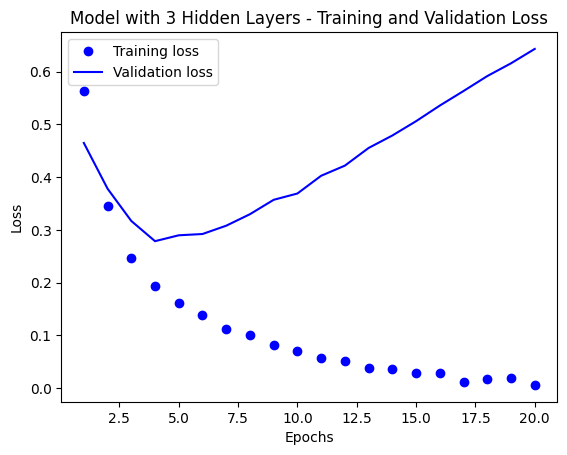

In [35]:
import matplotlib.pyplot as plt

triple_hidden_layer_history_dict = triple_hidden_layer_history.history
training_loss_triple_hl = triple_hidden_layer_history_dict["loss"]
validation_loss_triple_hl = triple_hidden_layer_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_triple_hl) + 1)

plt.plot(epoch_range, training_loss_triple_hl, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_triple_hl, "b", label="Validation loss")
plt.title("Model with 3 Hidden Layers - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy


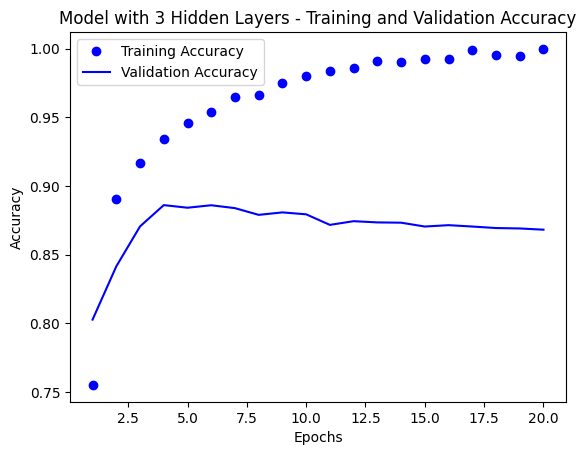

In [36]:
plt.clf()
training_acc_triple_hl = triple_hidden_layer_history_dict["accuracy"]
validation_acc_triple_hl = triple_hidden_layer_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_triple_hl, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_triple_hl, "b", label="Validation Accuracy")
plt.title("Model with 3 Hidden Layers - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [37]:
triple_hidden_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # 1st Hidden Layer
    layers.Dense(16, activation="relu"),  # 2nd Hidden Layer
    layers.Dense(16, activation="relu"),  # 3rd Hidden Layer
    layers.Dense(1, activation="sigmoid")
])

triple_hidden_layer_model.compile(optimizer="rmsprop",
                                  loss="binary_crossentropy",
                                  metrics=["accuracy"])

triple_hidden_layer_model.fit(reviews_train_encoded, sentiments_train_array, epochs=6, batch_size=512)
triple_hidden_layer_results = triple_hidden_layer_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6328 - loss: 0.6305
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8862 - loss: 0.3873
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9180 - loss: 0.2507
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9317 - loss: 0.1954
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9414 - loss: 0.1705
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9494 - loss: 0.1483
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8770 - loss: 0.3189


In [39]:
triple_hidden_layer_results

[0.3151107430458069, 0.8798800110816956]

Making Predictions by Using the Trained Data

In [40]:
triple_hidden_layer_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.14374498],
       [0.99840504],
       [0.7749249 ],
       ...,
       [0.14845441],
       [0.03717259],
       [0.7442619 ]], dtype=float32)

**3. Model with 32 Hidden Units**

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model with 32 hidden units
thirty_two_hidden_units_model = keras.Sequential([
    layers.Dense(32, activation="relu"),  # Hidden units 32
    layers.Dense(32, activation="relu"),  # Hidden units 32
    layers.Dense(1, activation="sigmoid")
])

thirty_two_hidden_units_model.compile(optimizer="rmsprop",
                                      loss="binary_crossentropy",
                                      metrics=["accuracy"])

# Train the model
thirty_two_hidden_units_history = thirty_two_hidden_units_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6918 - loss: 0.6023 - val_accuracy: 0.8579 - val_loss: 0.3814
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8837 - loss: 0.3299 - val_accuracy: 0.8860 - val_loss: 0.2973
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9247 - loss: 0.2263 - val_accuracy: 0.8669 - val_loss: 0.3261
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9365 - loss: 0.1870 - val_accuracy: 0.8862 - val_loss: 0.2814
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9483 - loss: 0.1498 - val_accuracy: 0.8700 - val_loss: 0.3319
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9543 - loss: 0.1319 - val_accuracy: 0.8766 - val_loss: 0.3154
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9635 - loss: 0.1112 - val_accuracy: 0.8736 - val_loss: 0.3540
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9721 - loss: 0.0937 - val_accuracy: 0.8852 - v

In [45]:
thirty_two_hidden_units_history_dict = thirty_two_hidden_units_history.history
thirty_two_hidden_units_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Show Training and Validation Loss**

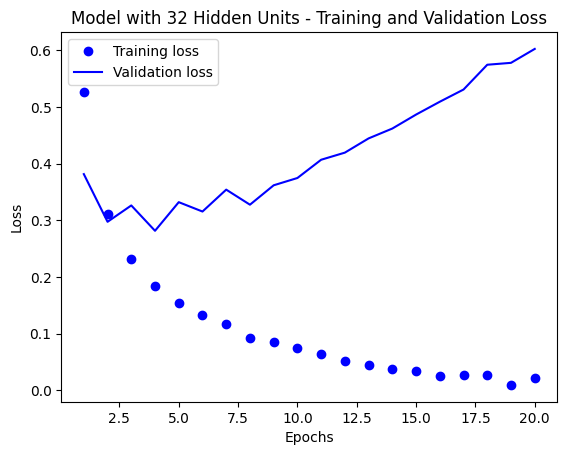

In [46]:
import matplotlib.pyplot as plt

thirty_two_hidden_units_history_dict = thirty_two_hidden_units_history.history
training_loss_32_hu = thirty_two_hidden_units_history_dict["loss"]
validation_loss_32_hu = thirty_two_hidden_units_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_32_hu) + 1)

plt.plot(epoch_range, training_loss_32_hu, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_32_hu, "b", label="Validation loss")
plt.title("Model with 32 Hidden Units - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Curve

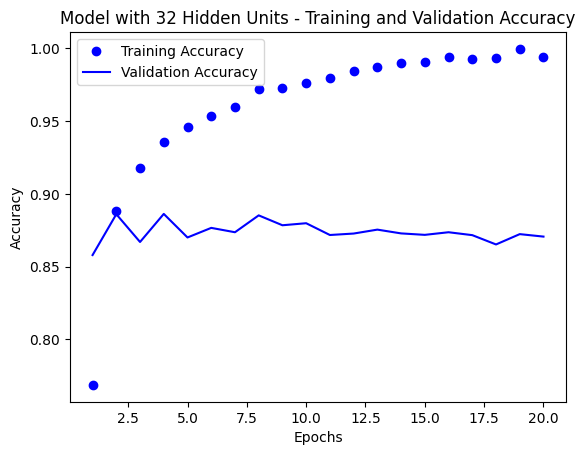

In [47]:
plt.clf()
training_acc_32_hu = thirty_two_hidden_units_history_dict["accuracy"]
validation_acc_32_hu = thirty_two_hidden_units_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_32_hu, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_32_hu, "b", label="Validation Accuracy")
plt.title("Model with 32 Hidden Units - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [48]:
thirty_two_hidden_units_model = keras.Sequential([
    layers.Dense(32, activation="relu"),  # 32 Hidden Units
    layers.Dense(32, activation="relu"),  # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])

thirty_two_hidden_units_model.compile(optimizer="rmsprop",
                                      loss="binary_crossentropy",
                                      metrics=["accuracy"])

thirty_two_hidden_units_model.fit(reviews_train_encoded, sentiments_train_array, epochs=3, batch_size=512)
thirty_two_hidden_units_results = thirty_two_hidden_units_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7220 - loss: 0.5545
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9019 - loss: 0.2752
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9207 - loss: 0.2096
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8858 - loss: 0.2848


In [49]:
thirty_two_hidden_units_results

[0.2852748930454254, 0.8870000243186951]

Making Predictions by Using the Trained Model

In [50]:
thirty_two_hidden_units_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.21391854],
       [0.99930394],
       [0.585239  ],
       ...,
       [0.11411382],
       [0.09652016],
       [0.41991216]], dtype=float32)

**4. Model With 64 Hidden Units**

In [51]:
sixty_four_hidden_units_history = sixty_four_units_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6756 - loss: 0.5951 - val_accuracy: 0.8572 - val_loss: 0.3624
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8919 - loss: 0.3011 - val_accuracy: 0.8766 - val_loss: 0.3063
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9197 - loss: 0.2243 - val_accuracy: 0.8863 - val_loss: 0.2757
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9412 - loss: 0.1682 - val_accuracy: 0.8839 - val_loss: 0.2814
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9526 - loss: 0.1376 - val_accuracy: 0.8808 - val_loss: 0.2989
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9608 - loss: 0.1160 - val_accuracy: 0.8822 - val_loss: 0.3070
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9657 - loss: 0.0982 - val_accuracy: 0.8792 - val_loss: 0.3258
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9807 - loss: 0.0702 - val_accuracy: 0.8806 - 

In [52]:
sixty_four_hidden_units_history_dict = sixty_four_hidden_units_history.history
sixty_four_hidden_units_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Show Training and Validation Loss**

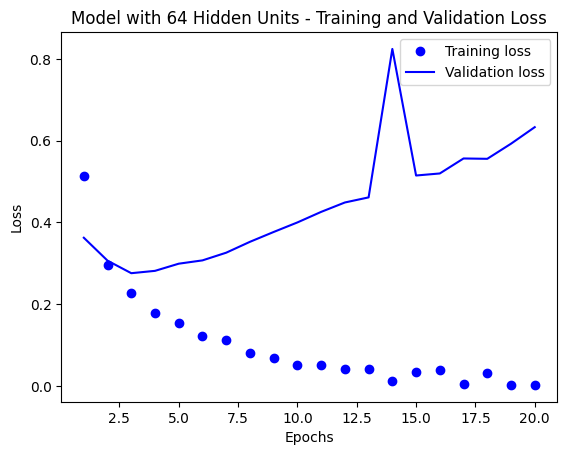

In [53]:
import matplotlib.pyplot as plt

sixty_four_hidden_units_history_dict = sixty_four_hidden_units_history.history
training_loss_64_hu = sixty_four_hidden_units_history_dict["loss"]
validation_loss_64_hu = sixty_four_hidden_units_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_64_hu) + 1)

plt.plot(epoch_range, training_loss_64_hu, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_64_hu, "b", label="Validation loss")
plt.title("Model with 64 Hidden Units - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Curve

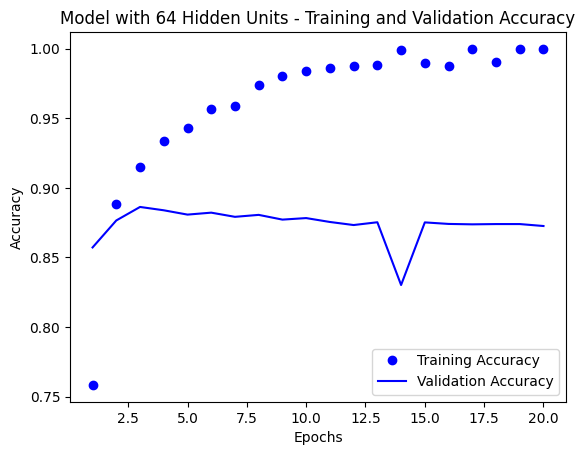

In [54]:
plt.clf()
training_acc_64_hu = sixty_four_hidden_units_history_dict["accuracy"]
validation_acc_64_hu = sixty_four_hidden_units_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_64_hu, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_64_hu, "b", label="Validation Accuracy")
plt.title("Model with 64 Hidden Units - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [56]:
sixty_four_hidden_units_model = keras.Sequential([
    layers.Dense(64, activation="relu"),  # 64 Hidden Units
    layers.Dense(64, activation="relu"),  # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])

sixty_four_hidden_units_model.compile(optimizer="rmsprop",
                                      loss="binary_crossentropy",
                                      metrics=["accuracy"])

sixty_four_hidden_units_model.fit(reviews_train_encoded, sentiments_train_array, epochs=2, batch_size=512)
sixty_four_hidden_units_results = sixty_four_hidden_units_model.evaluate(reviews_test_encoded, sentiments_test_array)


Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7178 - loss: 0.5524
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8919 - loss: 0.2809
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8851 - loss: 0.2846


In [57]:
sixty_four_hidden_units_results

[0.2852901220321655, 0.8853600025177002]

Making Predictions by Using the Trained Model

In [58]:
sixty_four_hidden_units_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.229705  ],
       [0.9965559 ],
       [0.77154744],
       ...,
       [0.09050532],
       [0.07818089],
       [0.37672368]], dtype=float32)

**5. Model with Mean Squared Error (MSE) Loss Function**

In [59]:
mse_loss_history = mse_loss_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7072 - loss: 0.2097 - val_accuracy: 0.8582 - val_loss: 0.1336
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8879 - loss: 0.1132 - val_accuracy: 0.8658 - val_loss: 0.1078
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9093 - loss: 0.0843 - val_accuracy: 0.8848 - val_loss: 0.0917
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9270 - loss: 0.0661 - val_accuracy: 0.8877 - val_loss: 0.0857
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9403 - loss: 0.0555 - val_accuracy: 0.8865 - val_loss: 0.0838
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9502 - loss: 0.0487 - val_accuracy: 0.8860 - val_loss: 0.0833
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9559 - loss: 0.0433 - val_accuracy: 0.8856 - val_loss: 0.0832
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9635 - loss: 0.0375 - val_accuracy: 0.8840 - 

In [60]:
mse_loss_history_dict = mse_loss_history.history
mse_loss_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Show Training and Validation Loss**

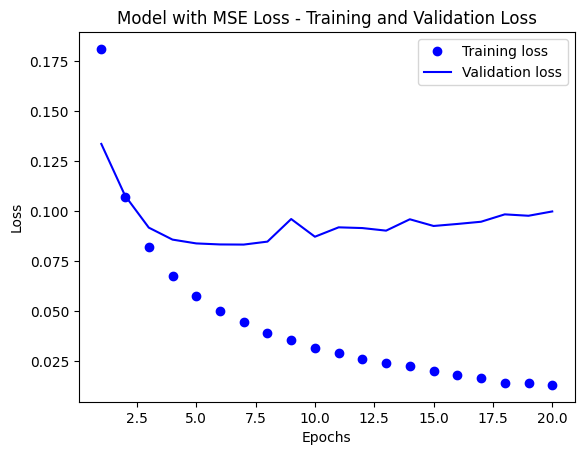

In [61]:
import matplotlib.pyplot as plt

mse_loss_history_dict = mse_loss_history.history
training_loss_mse = mse_loss_history_dict["loss"]
validation_loss_mse = mse_loss_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_mse) + 1)

plt.plot(epoch_range, training_loss_mse, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_mse, "b", label="Validation loss")
plt.title("Model with MSE Loss - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Curve

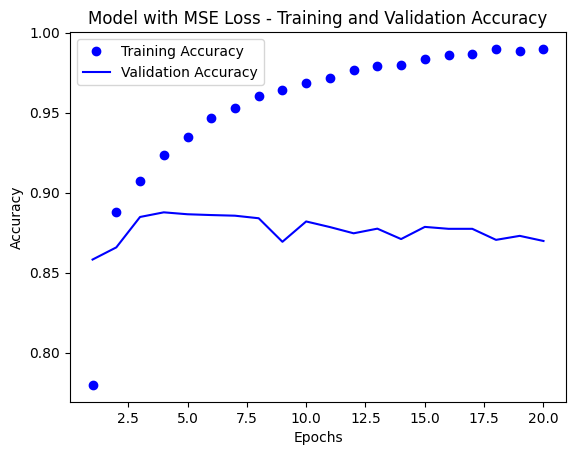

In [62]:
plt.clf()
training_acc_mse = mse_loss_history_dict["accuracy"]
validation_acc_mse = mse_loss_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_mse, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_mse, "b", label="Validation Accuracy")
plt.title("Model with MSE Loss - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [63]:
mse_loss_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

mse_loss_model.compile(optimizer="rmsprop",
                       loss="mse",  # MSE Loss Function
                       metrics=["accuracy"])

mse_loss_model.fit(reviews_train_encoded, sentiments_train_array, epochs=4, batch_size=512)
mse_loss_results = mse_loss_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7218 - loss: 0.1951
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8988 - loss: 0.0914
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9211 - loss: 0.0681
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9331 - loss: 0.0569
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8841 - loss: 0.0863


In [64]:
mse_loss_results

[0.08616535365581512, 0.8842800259590149]

Making Predictions by Using the Trained Data

In [65]:
mse_loss_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.16734324],
       [0.999192  ],
       [0.86433715],
       ...,
       [0.12924713],
       [0.08338387],
       [0.45019367]], dtype=float32)

**6. Model Featuring Tanh Activation**

In [66]:
tanh_activation_history = model_tanh_activation.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7211 - loss: 0.5745 - val_accuracy: 0.8500 - val_loss: 0.3862
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9000 - loss: 0.3071 - val_accuracy: 0.8752 - val_loss: 0.3043
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9247 - loss: 0.2181 - val_accuracy: 0.8892 - val_loss: 0.2743
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9459 - loss: 0.1629 - val_accuracy: 0.8854 - val_loss: 0.2766
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9542 - loss: 0.1359 - val_accuracy: 0.8845 - val_loss: 0.2950
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9706 - loss: 0.0991 - val_accuracy: 0.8826 - val_loss: 0.3179
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9741 - loss: 0.0853 - val_accuracy: 0.8770 - val_loss: 0.3459
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9829 - loss: 0.0670 - val_accuracy: 0.8685 - v

In [67]:
tanh_activation_history_dict = tanh_activation_history.history
tanh_activation_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Show Training and Validation Loss**

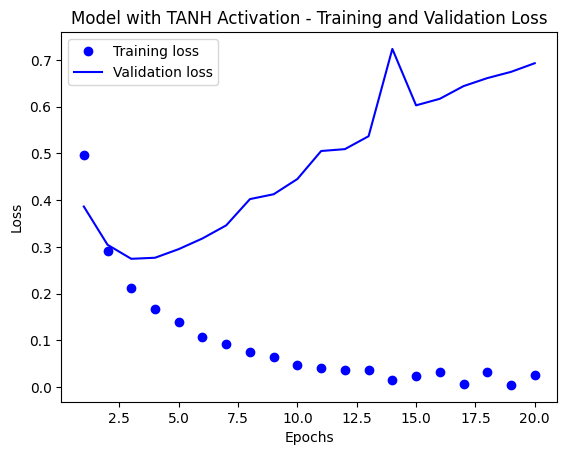

In [68]:
import matplotlib.pyplot as plt

tanh_activation_history_dict = tanh_activation_history.history
training_loss_tanh = tanh_activation_history_dict["loss"]
validation_loss_tanh = tanh_activation_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_tanh) + 1)

plt.plot(epoch_range, training_loss_tanh, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_tanh, "b", label="Validation loss")
plt.title("Model with TANH Activation - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Curve

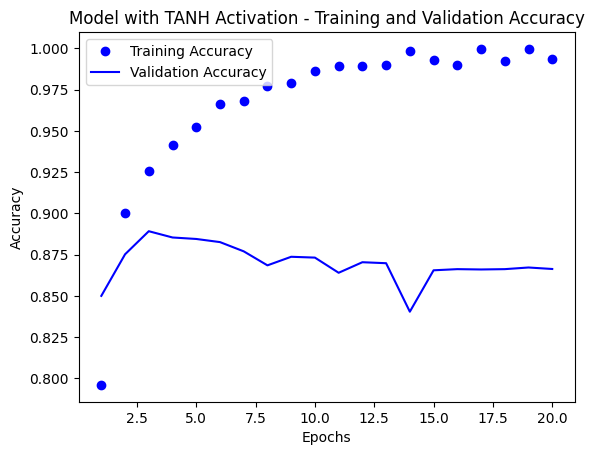

In [69]:
plt.clf()
training_acc_tanh = tanh_activation_history_dict["accuracy"]
validation_acc_tanh = tanh_activation_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_tanh, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_tanh, "b", label="Validation Accuracy")
plt.title("Model with TANH Activation - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [70]:
tanh_activation_model = keras.Sequential([
    layers.Dense(16, activation="tanh"),  # Tanh activation
    layers.Dense(16, activation="tanh"),  # Tanh activation
    layers.Dense(1, activation="sigmoid")
])

tanh_activation_model.compile(optimizer="rmsprop",
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

tanh_activation_model.fit(reviews_train_encoded, sentiments_train_array, epochs=3, batch_size=512)
tanh_activation_results = tanh_activation_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7515 - loss: 0.5319
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8998 - loss: 0.2703
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9303 - loss: 0.1869
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8763 - loss: 0.3042


In [71]:
tanh_activation_results

[0.29981017112731934, 0.8790000081062317]

Making Predictions by Using the Trained Model

In [72]:
tanh_activation_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.24050428],
       [0.99665624],
       [0.9081341 ],
       ...,
       [0.15472464],
       [0.10139643],
       [0.7740895 ]], dtype=float32)

**7. Model With L2 Regularization**

In [73]:
l2_regularization_history = l2_regularized_model.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6253 - loss: 0.6743 - val_accuracy: 0.8126 - val_loss: 0.5341
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8675 - loss: 0.4816 - val_accuracy: 0.8533 - val_loss: 0.4370
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9121 - loss: 0.3632 - val_accuracy: 0.8377 - val_loss: 0.4291
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9241 - loss: 0.3005 - val_accuracy: 0.8876 - val_loss: 0.3429
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9428 - loss: 0.2553 - val_accuracy: 0.8718 - val_loss: 0.3704
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9488 - loss: 0.2353 - val_accuracy: 0.8850 - val_loss: 0.3457
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9561 - loss: 0.2133 - val_accuracy: 0.8826 - val_loss: 0.3465
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9567 - loss: 0.2040 - val_accuracy: 0.8384 - v

In [74]:
l2_regularization_history_dict = l2_regularization_history.history
l2_regularization_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Display Training and Validation Loss**

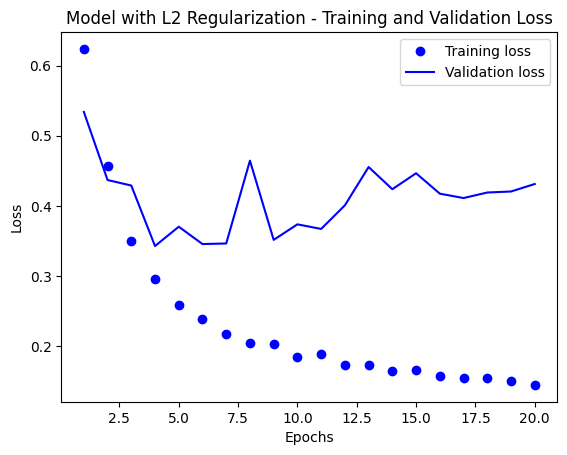

In [75]:
import matplotlib.pyplot as plt

l2_regularization_history_dict = l2_regularization_history.history
training_loss_l2 = l2_regularization_history_dict["loss"]
validation_loss_l2 = l2_regularization_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_l2) + 1)

plt.plot(epoch_range, training_loss_l2, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_l2, "b", label="Validation loss")
plt.title("Model with L2 Regularization - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Graph

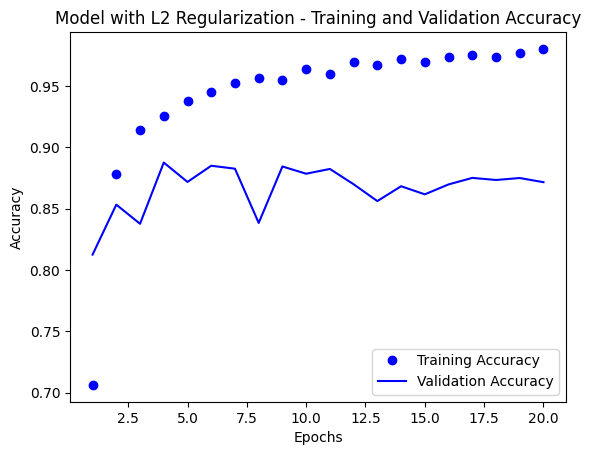

In [76]:
plt.clf()
training_acc_l2 = l2_regularization_history_dict["accuracy"]
validation_acc_l2 = l2_regularization_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_l2, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_l2, "b", label="Validation Accuracy")
plt.title("Model with L2 Regularization - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [77]:
l2_regularized_model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # Applied L2 regularization
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # Applied L2 regularization
    layers.Dense(1, activation="sigmoid")
])

l2_regularized_model.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])

l2_regularized_model.fit(reviews_train_encoded, sentiments_train_array, epochs=2, batch_size=512)
l2_regularization_results = l2_regularized_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7339 - loss: 0.6045
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8982 - loss: 0.3431
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.3381


In [78]:
l2_regularization_results

[0.33801257610321045, 0.889959990978241]

Making Predictions by Using the Trained Model

In [79]:
l2_regularized_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.36599338],
       [0.99164385],
       [0.778033  ],
       ...,
       [0.16275862],
       [0.19356214],
       [0.51728755]], dtype=float32)

**8. Model With Dropout Technique**

In [80]:
dropout_model_history = model_dropout.fit(
    partial_reviews_train,
    partial_sentiments_train,
    epochs=20,
    batch_size=512,
    validation_data=(reviews_val, sentiments_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5657 - loss: 0.6755 - val_accuracy: 0.8278 - val_loss: 0.5532
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7291 - loss: 0.5563 - val_accuracy: 0.8671 - val_loss: 0.4328
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7962 - loss: 0.4663 - val_accuracy: 0.8815 - val_loss: 0.3520
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8415 - loss: 0.3963 - val_accuracy: 0.8733 - val_loss: 0.3267
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8650 - loss: 0.3462 - val_accuracy: 0.8886 - val_loss: 0.2851
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8899 - loss: 0.3003 - val_accuracy: 0.8782 - val_loss: 0.3033
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9061 - loss: 0.2722 - val_accuracy: 0.8903 - val_loss: 0.2731
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9185 - loss: 0.2365 - val_accuracy: 0.8903 - v

In [82]:
dropout_model_history_dict = dropout_model_history.history
dropout_model_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the Graph to Display Training and Validation Loss**

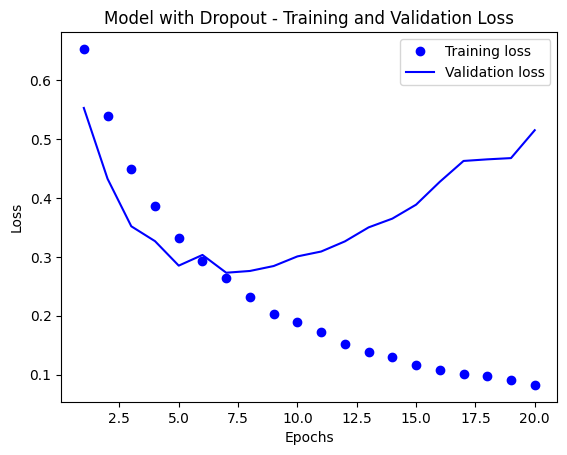

In [83]:
import matplotlib.pyplot as plt

dropout_model_history_dict = dropout_model_history.history
training_loss_dropout = dropout_model_history_dict["loss"]
validation_loss_dropout = dropout_model_history_dict["val_loss"]
epoch_range = range(1, len(training_loss_dropout) + 1)

plt.plot(epoch_range, training_loss_dropout, "bo", label="Training loss")
plt.plot(epoch_range, validation_loss_dropout, "b", label="Validation loss")
plt.title("Model with Dropout - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the Accuracy Graph

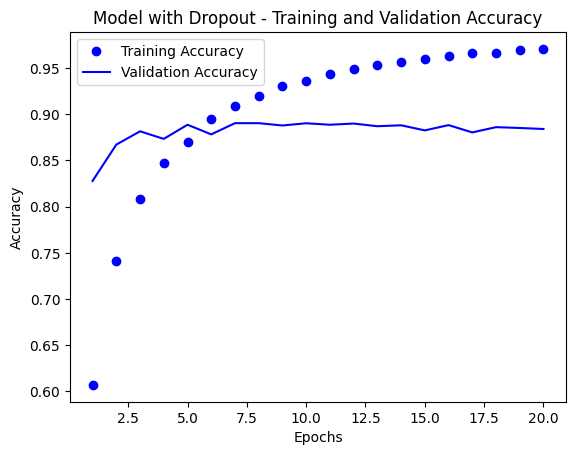

In [84]:
plt.clf()
training_acc_dropout = dropout_model_history_dict["accuracy"]
validation_acc_dropout = dropout_model_history_dict["val_accuracy"]

plt.plot(epoch_range, training_acc_dropout, "bo", label="Training Accuracy")
plt.plot(epoch_range, validation_acc_dropout, "b", label="Validation Accuracy")
plt.title("Model with Dropout - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model

In [85]:
dropout_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

dropout_model.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

dropout_model.fit(reviews_train_encoded, sentiments_train_array, epochs=9, batch_size=512)
dropout_model_results = dropout_model.evaluate(reviews_test_encoded, sentiments_test_array)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6192 - loss: 0.6377
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8029 - loss: 0.4511
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8623 - loss: 0.3608
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8888 - loss: 0.3012
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9061 - loss: 0.2668
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9207 - loss: 0.2334
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9292 - loss: 0.2082
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9383 - loss: 0.1904
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9424 - loss: 0.1761
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8790 - loss: 0.3396


In [86]:
dropout_model_results

[0.33690690994262695, 0.8804799914360046]

Making Predictions by Using the Trained Model

In [87]:
dropout_model.predict(reviews_test_encoded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.09421223],
       [1.        ],
       [0.9979842 ],
       ...,
       [0.04886092],
       [0.0394343 ],
       [0.8434256 ]], dtype=float32)

**Models Comparison Analysis**

Organizing the Training History of All Models

In [88]:
base_model_history_dict = base_model_history.history
base_model_history_dict.keys()

single_hidden_layer_history_dict = single_hidden_layer_history.history
single_hidden_layer_history_dict.keys()

triple_hidden_layer_history_dict = triple_hidden_layer_history.history
triple_hidden_layer_history_dict.keys()

thirty_two_hidden_units_history_dict = thirty_two_hidden_units_history.history
thirty_two_hidden_units_history_dict.keys()

sixty_four_hidden_units_history_dict = sixty_four_hidden_units_history.history
sixty_four_hidden_units_history_dict.keys()

mse_loss_history_dict = mse_loss_history.history
mse_loss_history_dict.keys()

tanh_activation_history_dict = tanh_activation_history.history
tanh_activation_history_dict.keys()

l2_regularization_history_dict = l2_regularization_history.history
l2_regularization_history_dict.keys()

dropout_model_history_dict = dropout_model_history.history
dropout_model_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Q1: Comparing Hidden Layers with the Base Model**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


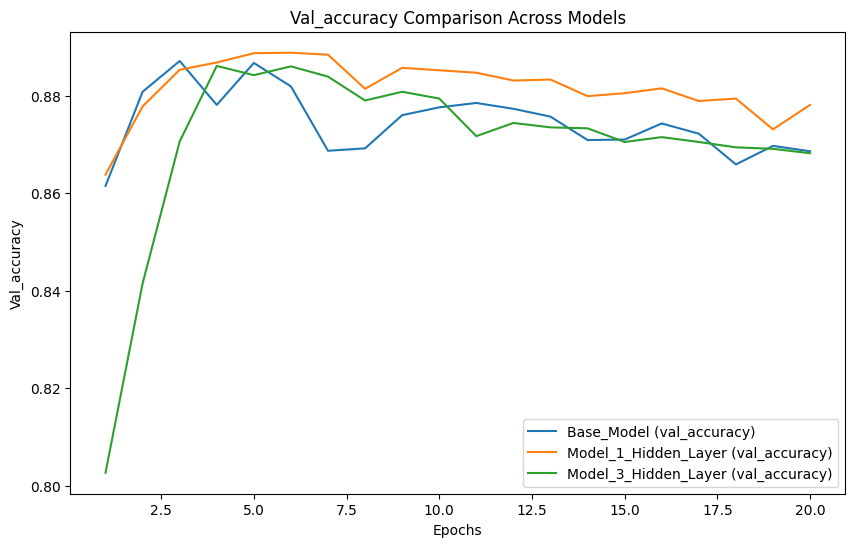

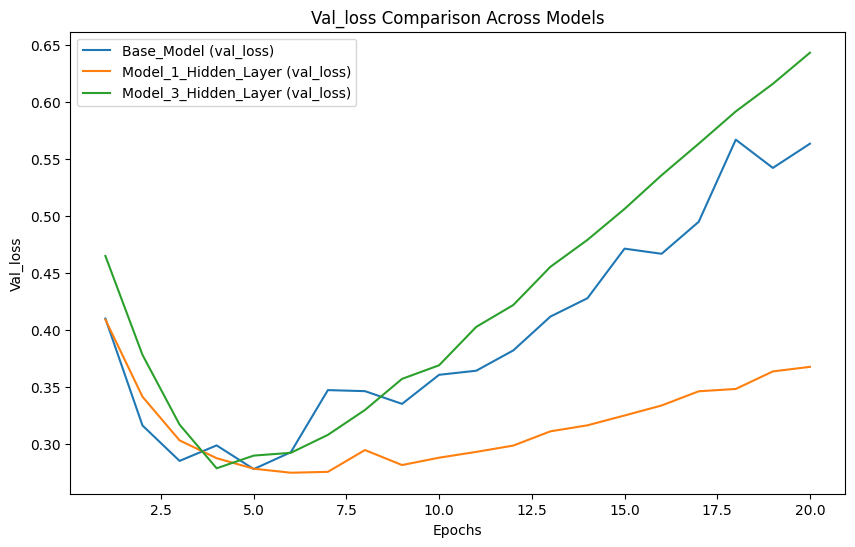

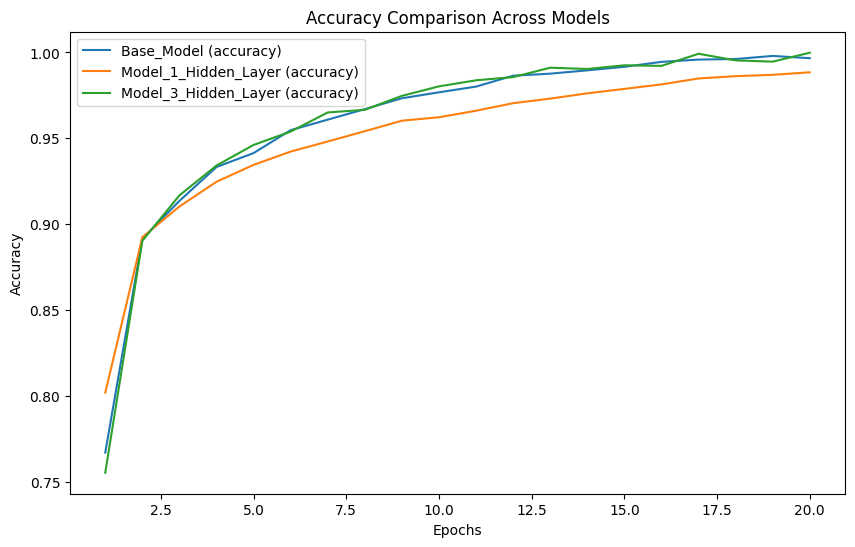

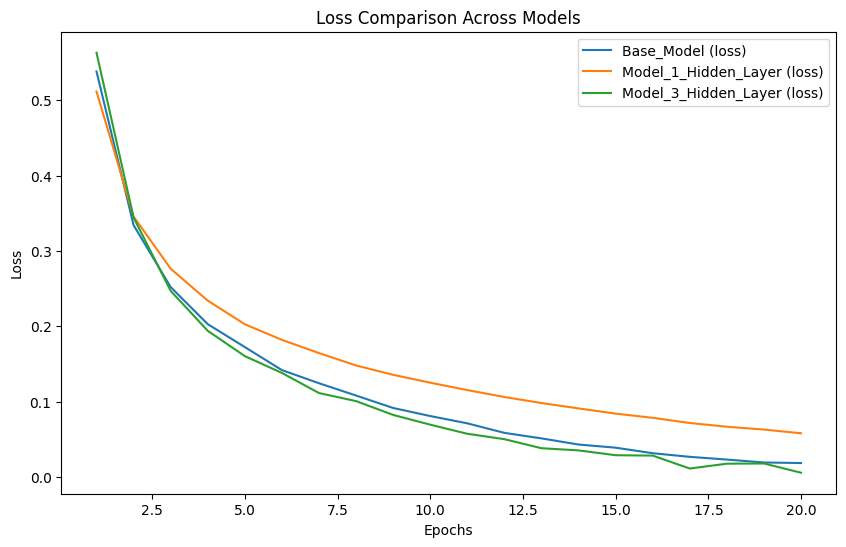

In [89]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_1_Hidden_Layer": single_hidden_layer_history,
    "Model_3_Hidden_Layer": triple_hidden_layer_history,
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')

**Q2: Comparing the Base Model with Hidden Units of 16, 32, and 64**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


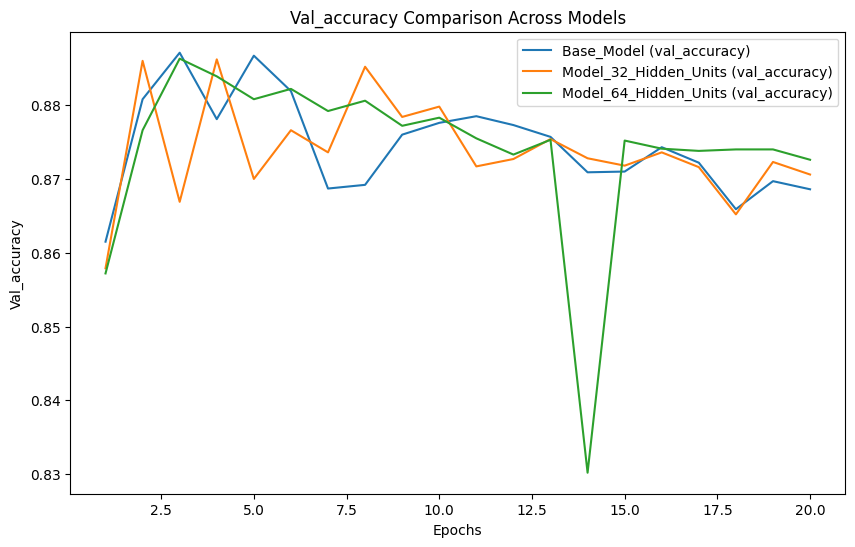

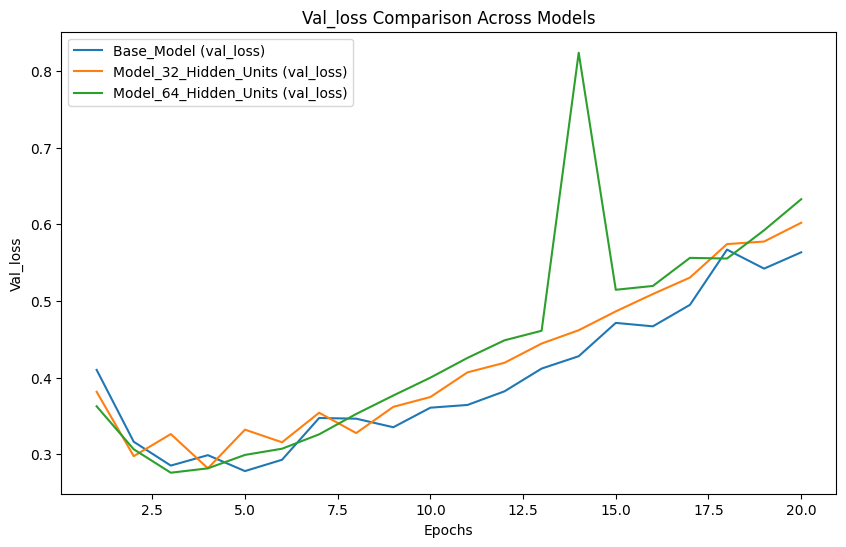

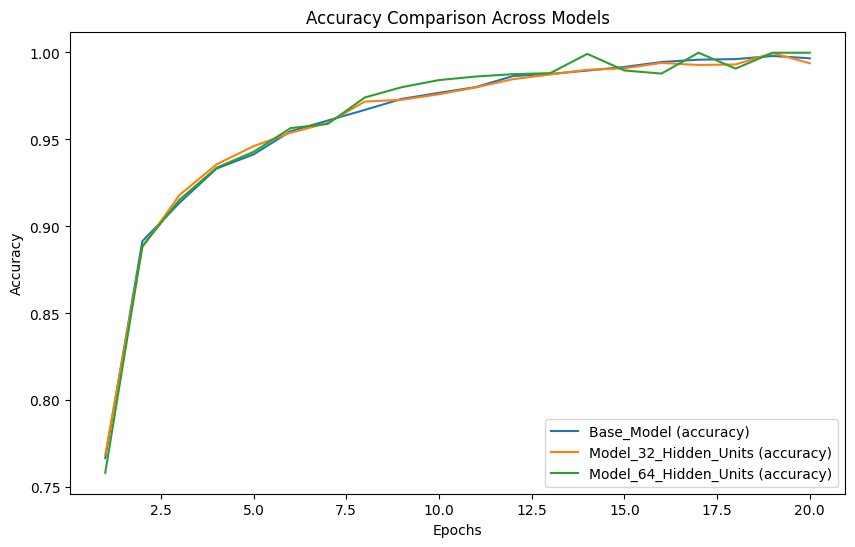

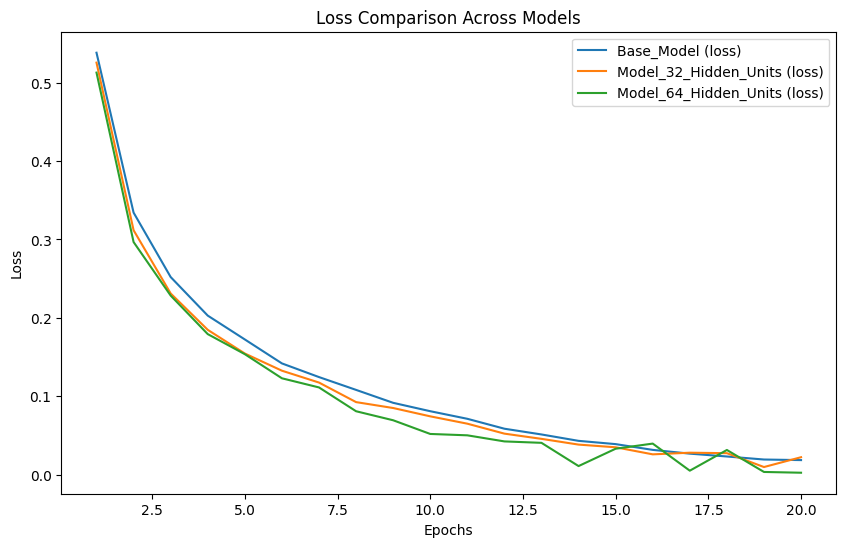

In [90]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_32_Hidden_Units": thirty_two_hidden_units_history,
    "Model_64_Hidden_Units": sixty_four_hidden_units_history,
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')

**Q3: Comparing the MSE Loss Function**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


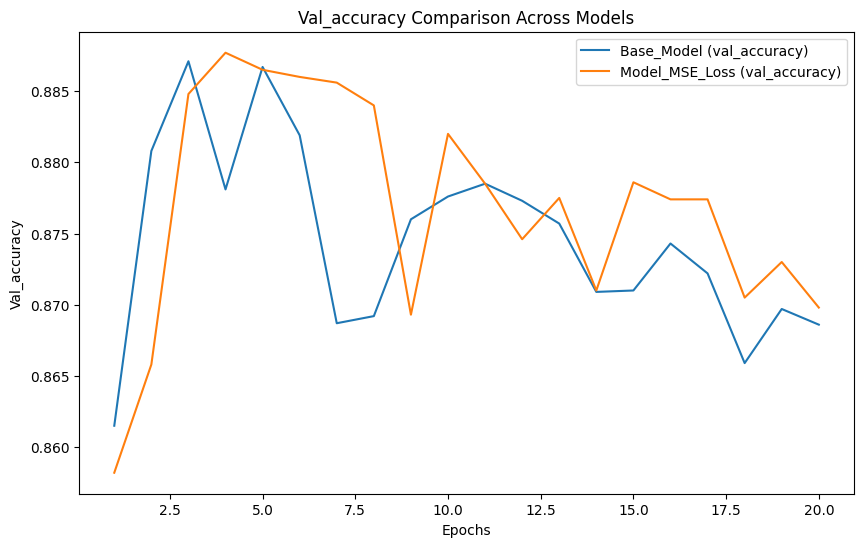

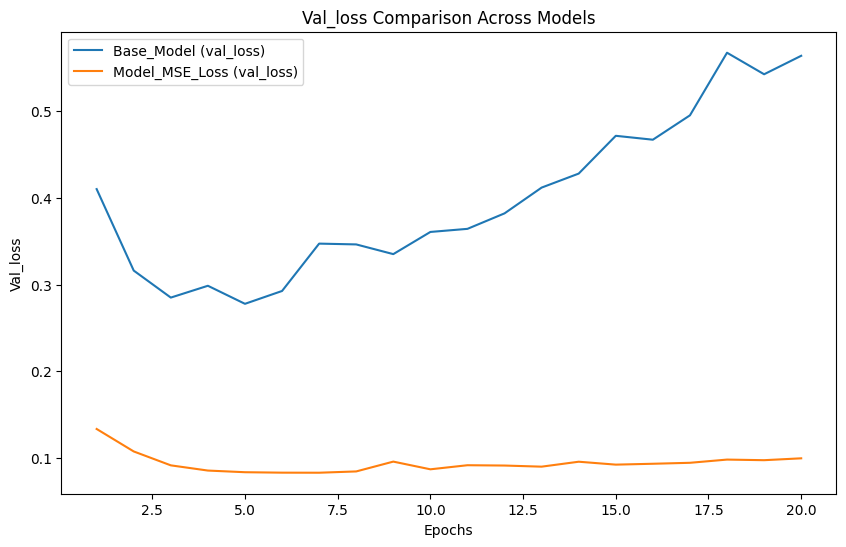

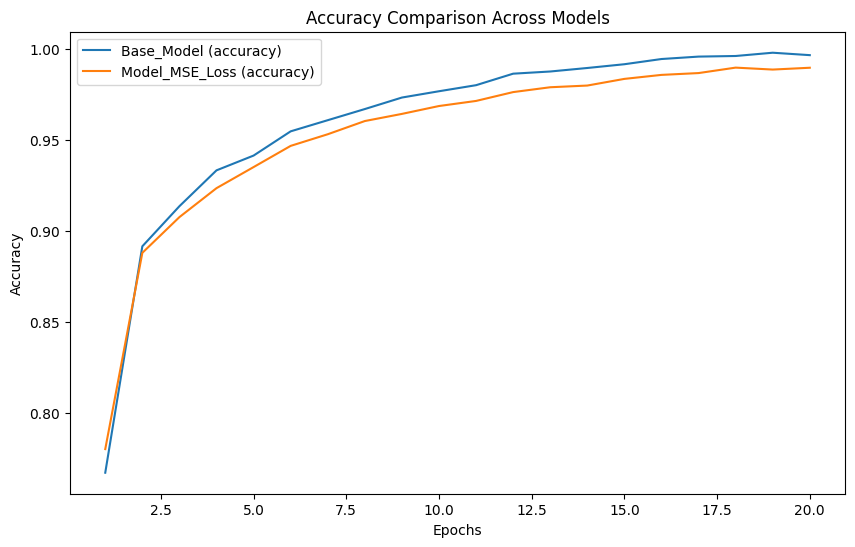

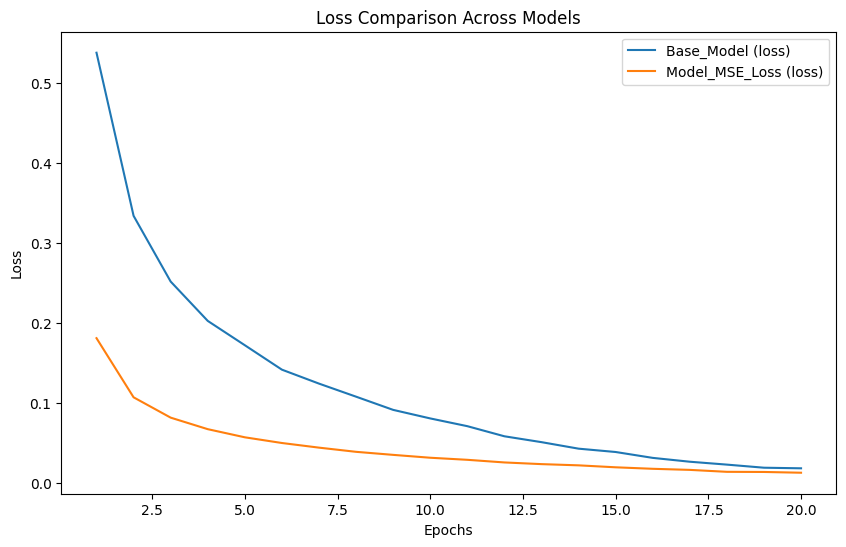

In [91]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_MSE_Loss": mse_loss_history,
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')

**Q4: Comparing Tanh Activation with the Base Model**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


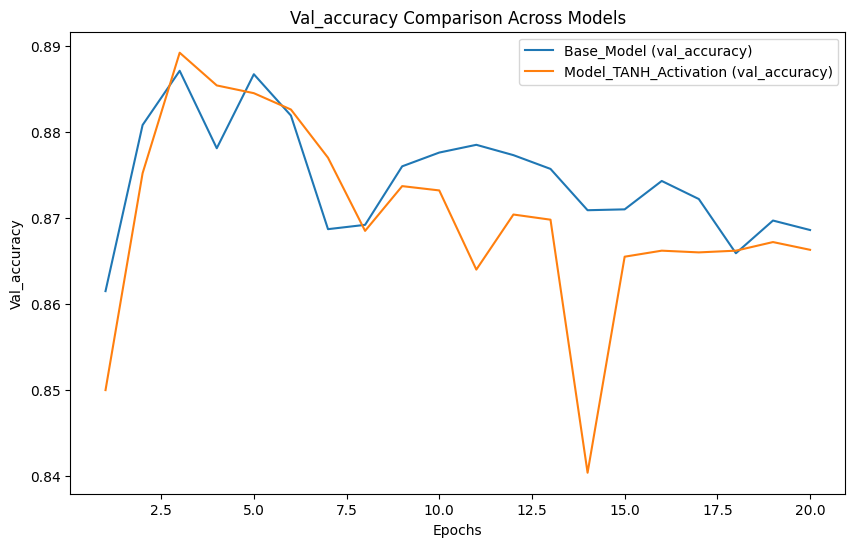

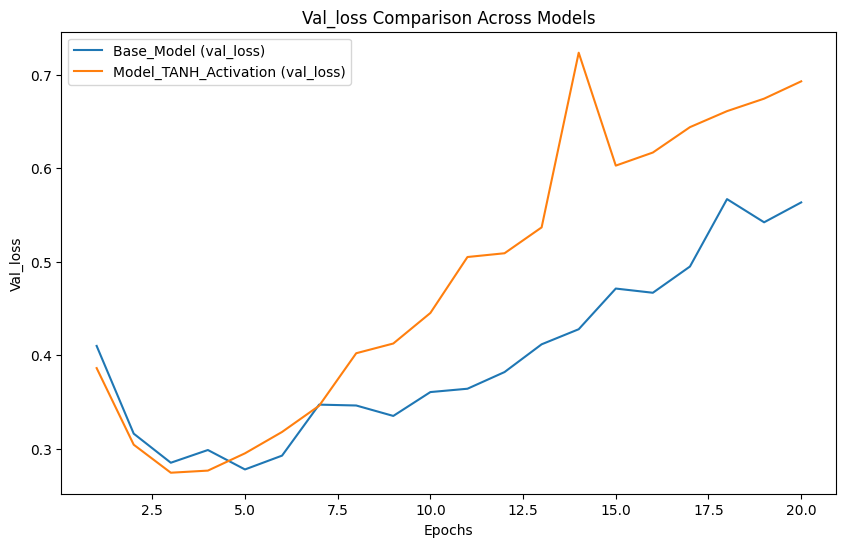

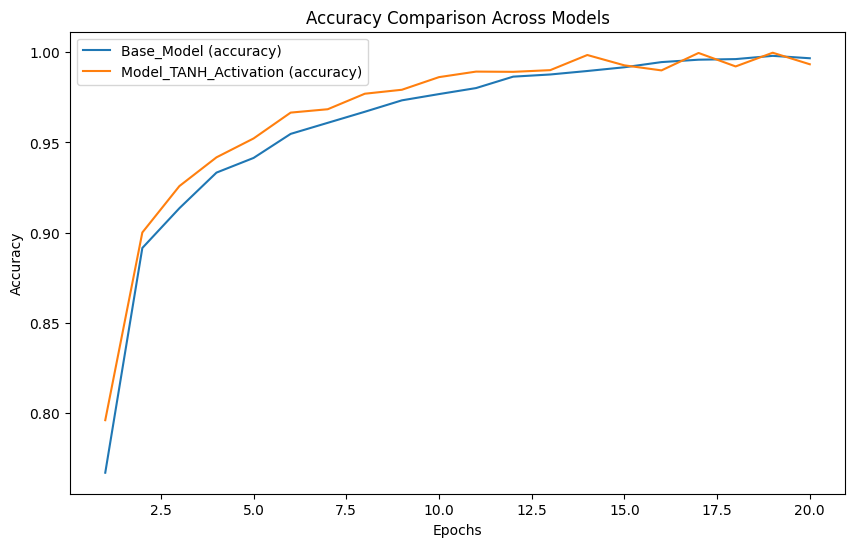

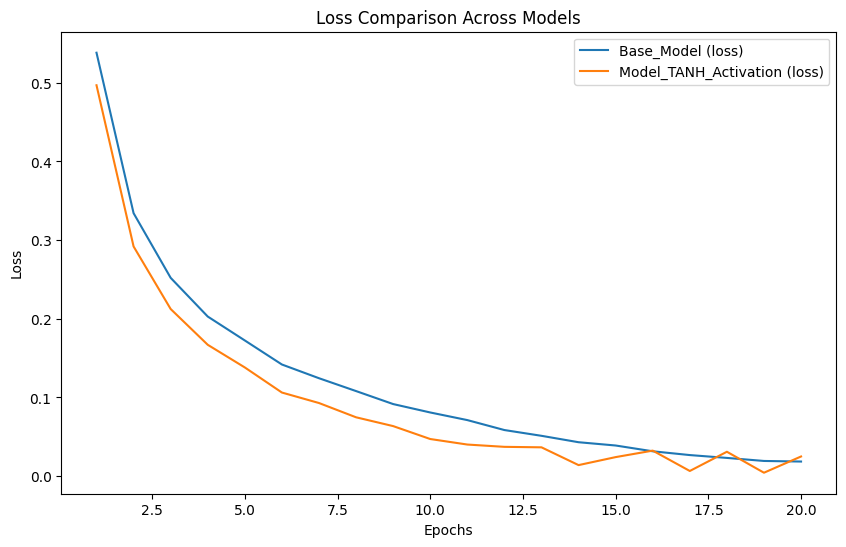

In [92]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_TANH_Activation": tanh_activation_history,
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')

**Q5: Comparing L2 Regularization, Dropout, and the Base Model**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


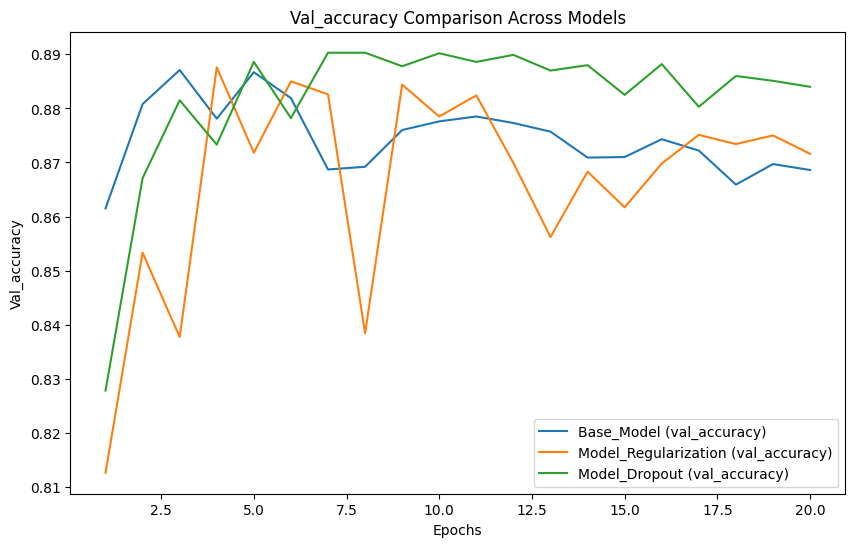

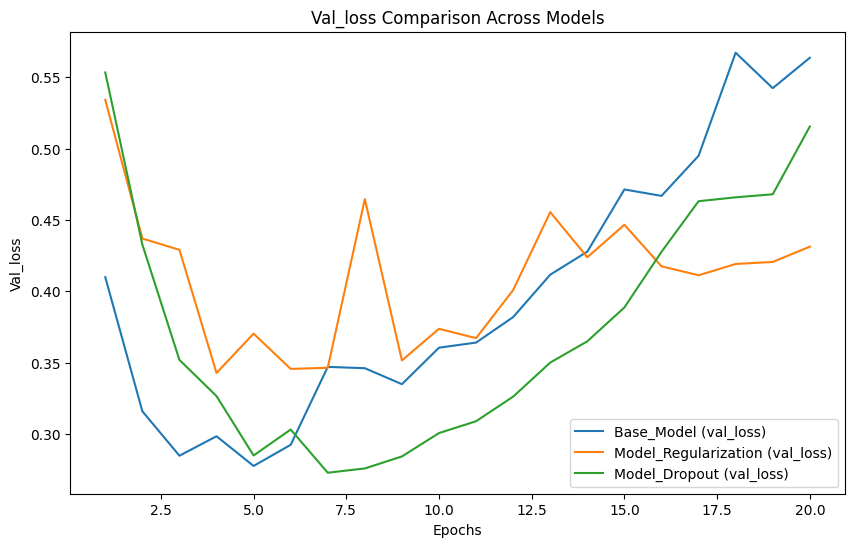

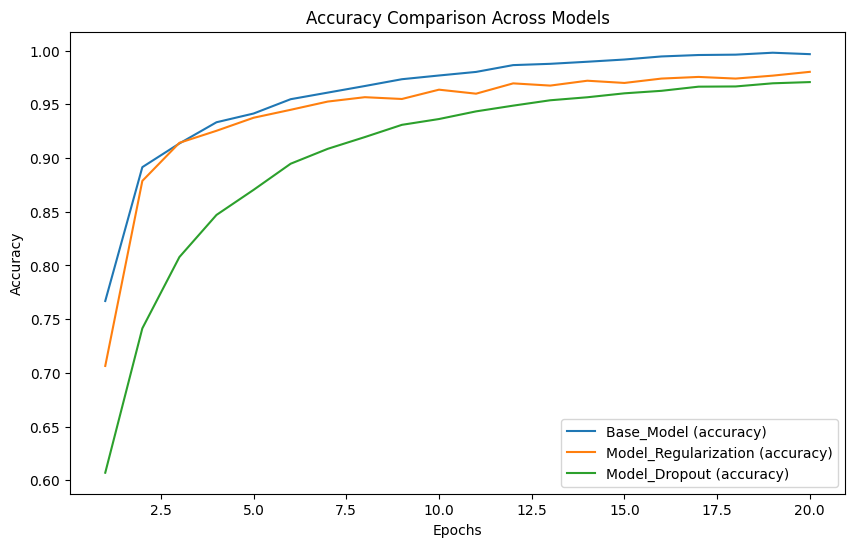

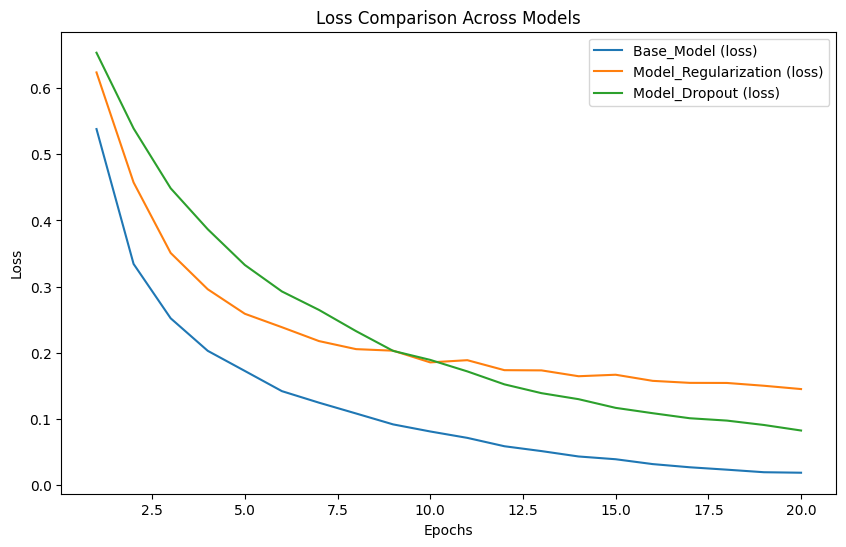

In [93]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_Regularization": l2_regularization_history,
    "Model_Dropout": dropout_model_history
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')


**Analysis of All Models**

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


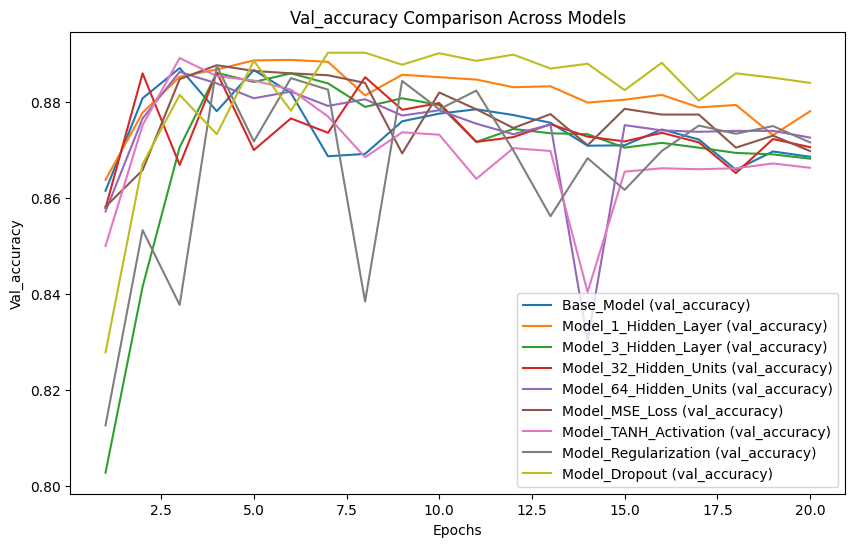

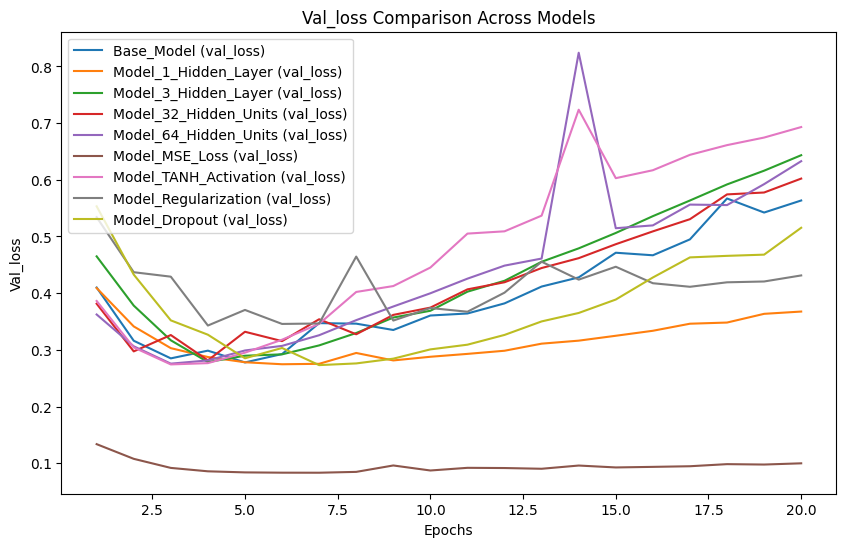

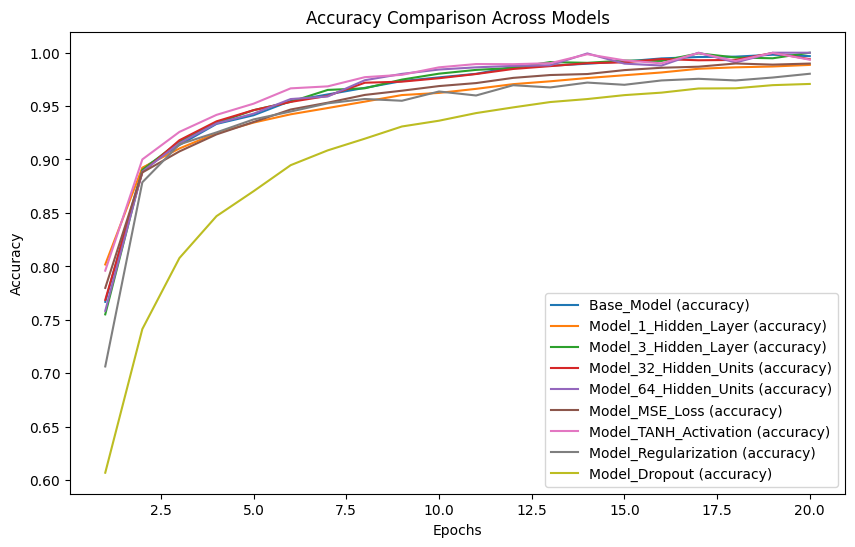

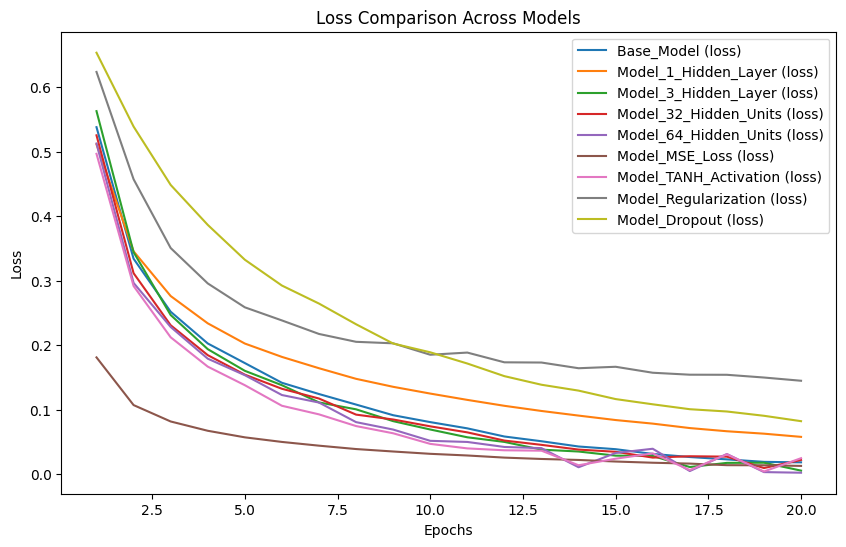

In [94]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": base_model_history,
    "Model_1_Hidden_Layer": single_hidden_layer_history,
    "Model_3_Hidden_Layer": triple_hidden_layer_history,
    "Model_32_Hidden_Units": thirty_two_hidden_units_history,
    "Model_64_Hidden_Units": sixty_four_hidden_units_history,
    "Model_MSE_Loss": mse_loss_history,
    "Model_TANH_Activation": tanh_activation_history,
    "Model_Regularization": l2_regularization_history,
    "Model_Dropout": dropout_model_history
}

# Extract and display keys of histories
for model_name, model_history in model_histories.items():
    history_dict = model_history.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model_history in model_histories.items():
        metric_values = model_history.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plotting validation accuracy
plot_metrics('val_accuracy')

# Plotting validation loss
plot_metrics('val_loss')

# Plotting training accuracy
plot_metrics('accuracy')

# Plotting training loss
plot_metrics('loss')